<a href="https://colab.research.google.com/github/dhruvilun522/smartPhone_VS_selfControl/blob/main/EDA_smartphone_vs_selfcontrol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**research question**:Impact of Smartphone Addiction on Self-Control

**constructs and operationalization:**
1. **self control score(13 item)**: used brief self control scale to measure self control score(proved validity in cover pdf) . its a 5 level likert scale with score range from 13 to 65.
2. **smart phone addiction score(10 item)**: used smart phone addtiction scale short version (SAS-SV proved validity in cover pdf ). its a 6 level likert scale with score range from 10 to 60.

**dataset size:** we have collected 119 data item of 107 data item are in use because of age constraints we have to remove 12 data set which are of age greater than 25.


In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.graph_objs as go
from scipy.stats import pearsonr

In [2]:
## setting some options so as to view all columns/features
pd.set_option("display.max_columns",50)

In [3]:
## loading and viewing data
data=pd.read_csv("./data.csv")
data.head()

,Timestamp,Age,Gender,Level of Education(Mention Highest Degree completed),What languages do you speak fluently?(Mention all),Where are you from?(Mention State),Hobbies,"special skills (e.g. programming, dancing, math,\nsports)",How satisfied are you with life?,1. Missing planned work due to smartphone use,"2. Having a hard time concentrating in class, while doing assignments, or while working due to smartphone use",3. Feeling pain in the wrists or at the back of the neck while using a smartphone,4. Won’t be able to stand not having a smartphone,5. Feeling impatient and fretful when I am not holding my smartphone,6. Having my smartphone in my mind even when I am not using it,7. I will never give up using my smartphone even when my daily life is already greatly affected by it,"8. Constantly checking my smartphone so as not to miss conversations between other people on WhatsApp, Facebook, or Instagram",9. Using my smartphone longer than I had intended,10. The people around me tell me that I use my smartphone too much,addiction score,1. I am good at resisting temptation.,2. I have a hard time breaking bad habits.,3. I am lazy.,4. I say inappropriate things.,"5. I do certain things that are bad for me, if they are fun.",6. I refuse things that are bad for me.,7. I wish I had more self-discipline.,8. People would say that 1 have iron self-discipline.,9. Pleasure and fun sometimes keep me from getting work done.,10. I have trouble concentrating.,11. I am able to work effectively toward long-term goals.,"12. Sometimes I can’t stop myself from doing something, even if I know it is wrong.",13. I often act without thinking through all the alternatives.,self control score,"Have you ever been diagnosed with any mental health conditions (e.g., depression, anxiety, ADHD)?( If yes, please specify)",How many hours per day do you typically spend using your smartphone?,Score,Email address
0,12-04-2024 20:00,20,Male,12,"hindi,english,gujarati",Gujarat,Sleeping,NaN,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,6.0,4.0,29.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,1.0,3.0,4.0,3.0,34.0,no,10,NaN,NaN
1,13-04-2024 13:25,38,Female,grad,"Gujarati, Hindi, English",Gujarat,Painting,NaN,4.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,19.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,3.0,4.0,2.0,3.0,43.0,No,5 hrs,NaN,NaN
2,13-04-2024 13:42,20,Male,grad,"Gujarati, hindi, english",Gujarat,Watching movies,Programing,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,23.0,3.0,1.0,1.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,48.0,No,3,NaN,NaN
3,13-04-2024 13:50,41,Female,M.A,"Gujarati, Hindi",Gujarat,Yoga,Yoga,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,15.0,3.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,2.0,48.0,No,1,NaN,NaN
4,13-04-2024 14:20,55,Male,grad,Gujarati Hindi English,Gujarat,Playing cricket,Cricket,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,4.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,40.0,No,1,NaN,NaN


In [4]:
data_lower = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-4-feb6d2f43c9f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_lower = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [5]:
## removing rows and columns with more than 20% nan values

## for rows
none_value_per_row_mask=data_lower.isnull().sum(axis=1)<8
data_lower=data_lower[none_value_per_row_mask]

## removing score and email address
data_lower.drop(columns=["Score","Email address","Timestamp","addiction score","self control score"],axis=1,inplace=True)

<ipython-input-5-89a0680ff97b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lower.drop(columns=["Score","Email address","Timestamp","addiction score","self control score"],axis=1,inplace=True)


In [6]:
# converting column names to form question_1
question_column_dict={}
column_question_dict={}
for indi,column in enumerate(data_lower.columns):
    question=f"question_{indi}"
    question_column_dict[question]=column
    column_question_dict[column]=question
data_lower.rename(columns=column_question_dict,inplace="True")

In [7]:
data_lower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 119
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_0   119 non-null    object 
 1   question_1   119 non-null    object 
 2   question_2   119 non-null    object 
 3   question_3   119 non-null    object 
 4   question_4   119 non-null    object 
 5   question_5   119 non-null    object 
 6   question_6   113 non-null    object 
 7   question_7   119 non-null    float64
 8   question_8   119 non-null    float64
 9   question_9   119 non-null    float64
 10  question_10  119 non-null    float64
 11  question_11  119 non-null    float64
 12  question_12  119 non-null    float64
 13  question_13  119 non-null    float64
 14  question_14  119 non-null    float64
 15  question_15  119 non-null    float64
 16  question_16  119 non-null    float64
 17  question_17  119 non-null    float64
 18  question_18  119 non-null    float64
 19  question_19  

In [8]:
data_lower.head()

,question_0,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21,question_22,question_23,question_24,question_25,question_26,question_27,question_28,question_29,question_30,question_31,question_32
0,20,male,12,"hindi,english,gujarati",gujarat,sleeping,NaN,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,6.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,1.0,3.0,4.0,3.0,no,10
1,38,female,grad,"gujarati, hindi, english",gujarat,painting,NaN,4.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,3.0,4.0,2.0,3.0,no,5 hrs
2,20,male,grad,"gujarati, hindi, english",gujarat,watching movies,programing,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,no,3
3,41,female,m.a,"gujarati, hindi",gujarat,yoga,yoga,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,2.0,no,1
4,55,male,grad,gujarati hindi english,gujarat,playing cricket,cricket,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,no,1


In [9]:
## preparing out independent feature
data_lower["addiction score"]=0

addiction_determining_column_list=[]
for i in range(8,18):
    addiction_determining_column_list.append(f"question_{i}")
data_lower["addiction score"]=data_lower[addiction_determining_column_list].sum(axis=1).values


In [10]:
## preparing out dependent feature
data_lower["self control score"]=0
def calculate_self_control_score(x):
    return 54+x["question_18"]+x["question_23"]+x["question_25"]+x["question_28"]-(x["question_19"]+x["question_20"]+x["question_21"]+x["question_22"]+x["question_24"]+x["question_26"]+x["question_27"]+x["question_29"]+x["question_30"])

data_lower["self control score"]=data_lower.apply(calculate_self_control_score,axis=1)

In [11]:
data_lower.head()

,question_0,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21,question_22,question_23,question_24,question_25,question_26,question_27,question_28,question_29,question_30,question_31,question_32,addiction score,self control score
0,20,male,12,"hindi,english,gujarati",gujarat,sleeping,NaN,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,6.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,1.0,3.0,4.0,3.0,no,10,29.0,34.0
1,38,female,grad,"gujarati, hindi, english",gujarat,painting,NaN,4.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,3.0,4.0,2.0,3.0,no,5 hrs,19.0,43.0
2,20,male,grad,"gujarati, hindi, english",gujarat,watching movies,programing,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,no,3,23.0,48.0
3,41,female,m.a,"gujarati, hindi",gujarat,yoga,yoga,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,2.0,no,1,15.0,48.0
4,55,male,grad,gujarati hindi english,gujarat,playing cricket,cricket,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,no,1,10.0,40.0


In [12]:
data_lower.replace("other","male",inplace=True)

In [13]:
def converting_languages_to_list(x):
    listt=[]
    total_different_languages=['tamil','bhojpuri','nepali','urdu','gujarati','japanese','maithili','bangla','sindhi','english','hinglish','awadhi','marathi','german','marwari','english.','hindi','bengali','odia','telugu']
    curr=""
    for i in x["question_3"]:
        if i==" " or i=="," or i=="&":
            if curr!="" and curr!="and":
                if curr.startswith("and"):
                    curr=curr[3:]
                if curr in total_different_languages:
                    listt.append(curr)
                curr=""
        else:
            curr+=i
    if curr!="" and curr!="and":
                if curr.startswith("and"):
                    curr=curr[3:]
                if curr in total_different_languages:
                    listt.append(curr)
                curr=""
    listt.sort()
    for i in range(len(listt)):
        if listt[i]=="english.":
            listt[i]="english"
        elif listt[i]=="bangla":
            listt[i]="bengali"

    return listt


data_lower["question_3"]=data_lower.apply(converting_languages_to_list,axis=1)

In [14]:
def converting_question_32_to_numerical_data(x):
    listt=[]
    curr=0
    count=1
    for i in x["question_32"]:
        if i.isnumeric() or i==".":
            if i=="." or count>2:
                count+=1
            if i!=".":
                curr=curr*10+int(i)
        else:
            if curr!=0:
                listt.append(curr/10**(count-1))
            curr=0
            count=1
    if curr!=0:
        listt.append(curr/10**(count-1))
    if len(listt)==0:
        return 3
    return sum(listt)/(len(listt))
data_lower["question_32"]=data_lower.apply(converting_question_32_to_numerical_data,axis=1)

In [15]:
def converting_question_0_to_int(x):
    try:

        a=int(x["question_0"])
    except:
        a=21
    return a
data_lower["question_0"]=data_lower.apply(converting_question_0_to_int,axis=1)

In [16]:
## restraining age to range 18 to 25 to constrain our research to this range only
data_age_18_to_25=data_lower[data_lower["question_0"]<25]
data_age_18_to_25.reset_index(inplace=True)
data_age_18_to_25.drop(columns=["index"],inplace=True)

<ipython-input-16-66bea8ff7973>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_18_to_25.drop(columns=["index"],inplace=True)


In [17]:
def handeling_question_4(x):
    x.strip()
    list_x=x.split(" ")
    to_return= "".join(list_x)
    if to_return=="orissa":
        return "odisha"
    return to_return
data_age_18_to_25["question_4"]=data_age_18_to_25["question_4"].apply(handeling_question_4)

<ipython-input-17-54cc3116096e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_18_to_25["question_4"]=data_age_18_to_25["question_4"].apply(handeling_question_4)


In [18]:
def handeling_question_5(x):
    x.strip()
    list_x=x.split(" ")
    to_return= "".join(list_x)
    return to_return
data_age_18_to_25["question_5"]=data_age_18_to_25["question_5"].apply(handeling_question_5)

<ipython-input-18-90cfb2bc4d06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_18_to_25["question_5"]=data_age_18_to_25["question_5"].apply(handeling_question_5)


In [19]:
def handeling_question_6(x):
    if type(x)==type(float("nan")):
        x="None"
    x.strip()
    list_x=x.split(" ")
    to_return= "".join(list_x)
    if to_return=="programing":
        return "programming"
    return to_return
data_age_18_to_25["question_6"]=data_age_18_to_25["question_6"].apply(handeling_question_6)

<ipython-input-19-8deafd9921fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_18_to_25["question_6"]=data_age_18_to_25["question_6"].apply(handeling_question_6)


In [20]:
def handeling_question_31(x):
    if x in ['no','no ', 'i dont know','nothing particular','nope','mo', 'nil']:
        return "No"
    return "Yes"
data_age_18_to_25["question_31"]=data_age_18_to_25["question_31"].apply(handeling_question_31)

<ipython-input-20-e16afd5049e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_18_to_25["question_31"]=data_age_18_to_25["question_31"].apply(handeling_question_31)


In [21]:
data_age_18_to_25

,question_0,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21,question_22,question_23,question_24,question_25,question_26,question_27,question_28,question_29,question_30,question_31,question_32,addiction score,self control score
0,20,male,12,"[english, gujarati, hindi]",gujarat,sleeping,None,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,6.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,1.0,3.0,4.0,3.0,No,10.0,29.0,34.0
1,20,male,grad,"[english, gujarati, hindi]",gujarat,watchingmovies,programming,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,No,3.0,23.0,48.0
2,20,male,12,"[english, hindi, maithili]",bihar,readingbooks,sports,4.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,4.0,5.0,5.0,4.0,2.0,3.0,4.0,3.0,4.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,No,17.0,26.0,42.0
3,21,male,12,"[english, hindi, urdu]",chhattisgarh,studyhistory,math,5.0,5.0,4.0,4.0,4.0,3.0,2.0,1.0,5.0,2.0,1.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,Yes,3.0,31.0,40.0
4,21,male,12,"[bengali, english, hindi]",madhyapradesh,photography,programming,1.0,1.0,3.0,1.0,1.0,5.0,2.0,1.0,5.0,5.0,2.0,4.0,5.0,2.0,4.0,3.0,3.0,4.0,2.0,2.0,4.0,5.0,3.0,3.0,Yes,3.0,26.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,20,male,12,"[english, hindi]",odisha,chess,math,1.0,4.0,2.0,5.0,6.0,1.0,2.0,3.0,6.0,5.0,2.0,1.0,2.0,2.0,5.0,5.0,5.0,3.0,3.0,3.0,1.0,4.0,1.0,3.0,No,3.0,36.0,42.0
103,20,male,12,"[english, hindi, marwari]",rajasthan,designing,math,0.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,3.0,5.0,3.0,5.0,5.0,Yes,10.0,60.0,19.0
104,20,male,12,"[gujarati, hindi]",gujarat,drawing,math,2.0,6.0,6.0,1.0,2.0,2.0,2.0,2.0,5.0,5.0,1.0,3.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,3.0,4.0,No,7.0,32.0,34.0
105,21,male,12,"[english, hindi]",madhyapradesh,listeningmusic,programming,2.0,5.0,5.0,3.0,4.0,3.0,1.0,2.0,6.0,5.0,2.0,2.0,5.0,5.0,5.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,4.0,4.0,No,4.0,36.0,24.0


In [22]:
data_age_18_to_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   question_0          107 non-null    int64  
 1   question_1          107 non-null    object 
 2   question_2          107 non-null    object 
 3   question_3          107 non-null    object 
 4   question_4          107 non-null    object 
 5   question_5          107 non-null    object 
 6   question_6          107 non-null    object 
 7   question_7          107 non-null    float64
 8   question_8          107 non-null    float64
 9   question_9          107 non-null    float64
 10  question_10         107 non-null    float64
 11  question_11         107 non-null    float64
 12  question_12         107 non-null    float64
 13  question_13         107 non-null    float64
 14  question_14         107 non-null    float64
 15  question_15         107 non-null    float64
 16  question

In [23]:
data_age_18_to_25[['question_0','question_7','question_32','addiction score','self control score']].describe()


,question_0,question_7,question_32,addiction score,self control score
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,20.084112,3.214953,5.535047,32.289720,38.028037
std,1.091316,1.407715,3.063296,10.395036,7.575355
min,18.000000,0.000000,1.000000,10.000000,19.000000
25%,20.000000,2.000000,3.000000,26.000000,33.000000
50%,20.000000,3.000000,5.000000,34.000000,38.000000
75%,21.000000,4.000000,7.000000,39.500000,42.500000
max,23.000000,5.000000,17.000000,60.000000,59.000000


In [24]:
correlation_matrix=data_age_18_to_25[['question_0','question_7','question_32','addiction score','self control score']].corr()
df=data_age_18_to_25[['question_0','question_7','question_32','addiction score','self control score']]
p_values = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate p-values for each pair of columns
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            corr, p_value = pearsonr(df[col1], df[col2])
            p_values.loc[col1, col2] = p_value
        else:
            p_values.loc[col1, col2] = None  # No p-value for the same column

# Display the correlation matrix and p-values
print("Correlation Matrix:")
print(correlation_matrix)
print("\nP-Values Matrix:")
print(p_values)

Correlation Matrix:
                    question_0  question_7  question_32  addiction score  \
question_0            1.000000    0.080233    -0.113769         0.051054   
question_7            0.080233    1.000000    -0.171311        -0.302789   
question_32          -0.113769   -0.171311     1.000000         0.423780   
addiction score       0.051054   -0.302789     0.423780         1.000000   
self control score    0.182295    0.382487    -0.335742        -0.599834   

                    self control score  
question_0                    0.182295  
question_7                    0.382487  
question_32                  -0.335742  
addiction score              -0.599834  
self control score            1.000000  

P-Values Matrix:
                   question_0 question_7 question_32 addiction score  \
question_0               None   0.411354    0.243287        0.601497   
question_7           0.411354       None     0.07768        0.001524   
question_32          0.243287    0.07768   

In [25]:
## preparing data for train
train_test_data=data_age_18_to_25[["question_0","question_1","question_2","question_3","question_4","question_31","addiction score","self control score"]]

In [26]:
train_test_data_original=train_test_data.copy(deep=True)
train_test_data

,question_0,question_1,question_2,question_3,question_4,question_31,addiction score,self control score
0,20,male,12,"[english, gujarati, hindi]",gujarat,No,29.0,34.0
1,20,male,grad,"[english, gujarati, hindi]",gujarat,No,23.0,48.0
2,20,male,12,"[english, hindi, maithili]",bihar,No,26.0,42.0
3,21,male,12,"[english, hindi, urdu]",chhattisgarh,Yes,31.0,40.0
4,21,male,12,"[bengali, english, hindi]",madhyapradesh,Yes,26.0,38.0
...,...,...,...,...,...,...,...,...
102,20,male,12,"[english, hindi]",odisha,No,36.0,42.0
103,20,male,12,"[english, hindi, marwari]",rajasthan,Yes,60.0,19.0
104,20,male,12,"[gujarati, hindi]",gujarat,No,32.0,34.0
105,21,male,12,"[english, hindi]",madhyapradesh,No,36.0,24.0


In [27]:
##EDA

In [30]:
# correlation matrix between numerical values
train_test_data1=data_age_18_to_25[["question_0","addiction score","self control score"]]
train_test_data1.corr()

,question_0,addiction score,self control score
question_0,1.000000,0.051054,0.182295
addiction score,0.051054,1.000000,-0.599834
self control score,0.182295,-0.599834,1.000000


In [ ]:
## we can see that is a negative correlation between addiction score and self control score
## suggesting more the addiction less will be self control

## And there is also a little correlation between age(question_0) and self control score
## suggesting as age increasses self control increases


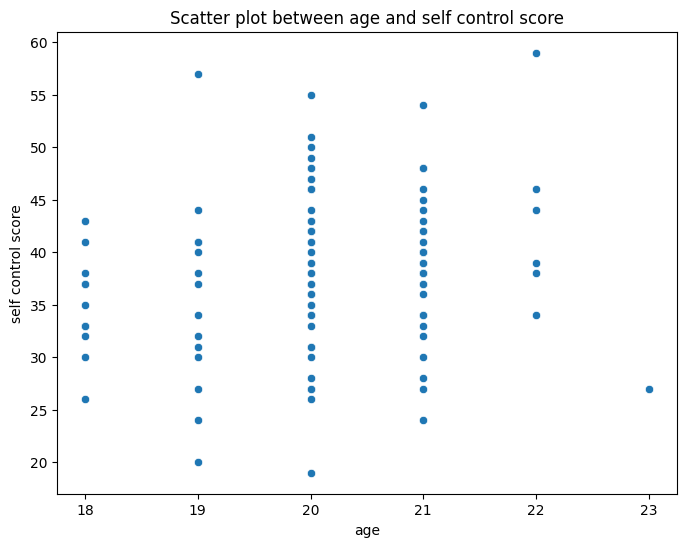

In [31]:
## scatter plot between age(question_0) and self control score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='question_0', y='self control score', data=train_test_data)
plt.title("Scatter plot between age and self control score")
plt.xlabel("age")
plt.ylabel("self control score")
plt.show()
## we can see there is a very small relation between two

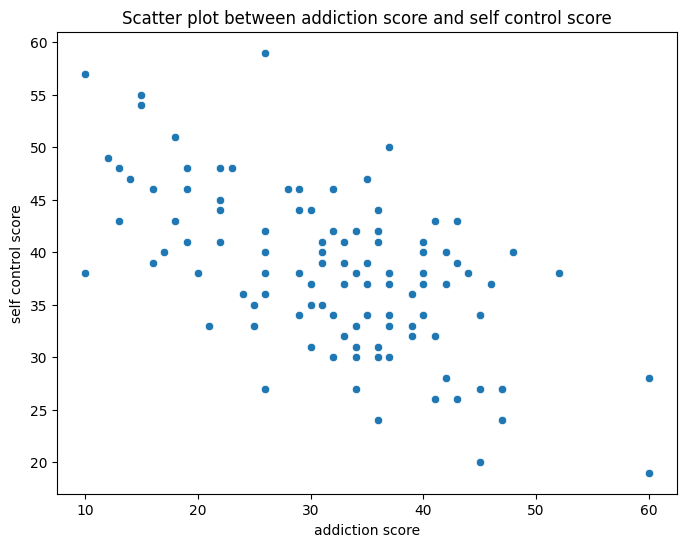

In [32]:
## scatter plot between addiction score and self control score
plt.figure(figsize=(8, 6))
sns.scatterplot(x="addiction score", y="self control score", data=train_test_data)
plt.title("Scatter plot between addiction score and self control score")
plt.xlabel("addiction score")
plt.ylabel("self control score")
plt.show()
## we can see there is a very quite good negatve relation between two

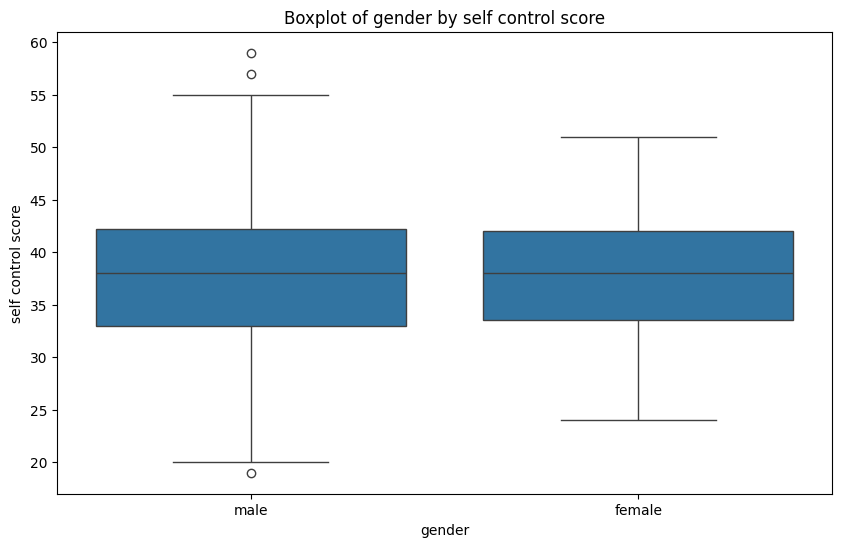

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='question_1', y='self control score', data=train_test_data)
plt.title('Boxplot of gender by self control score')
plt.xlabel('gender')
plt.ylabel('self control score')
plt.show()

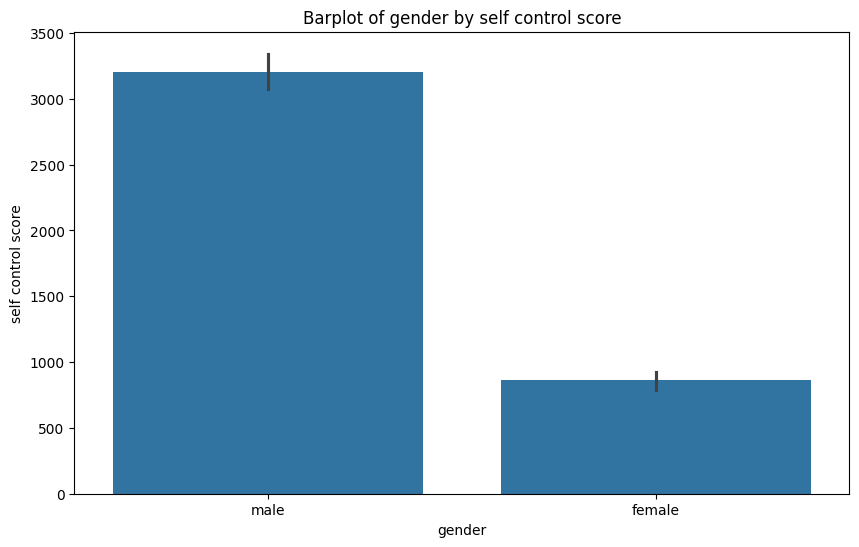

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='question_1', y='self control score', data=train_test_data,estimator=sum)
plt.title('Barplot of gender by self control score')
plt.xlabel('gender')
plt.ylabel('self control score')
plt.show()

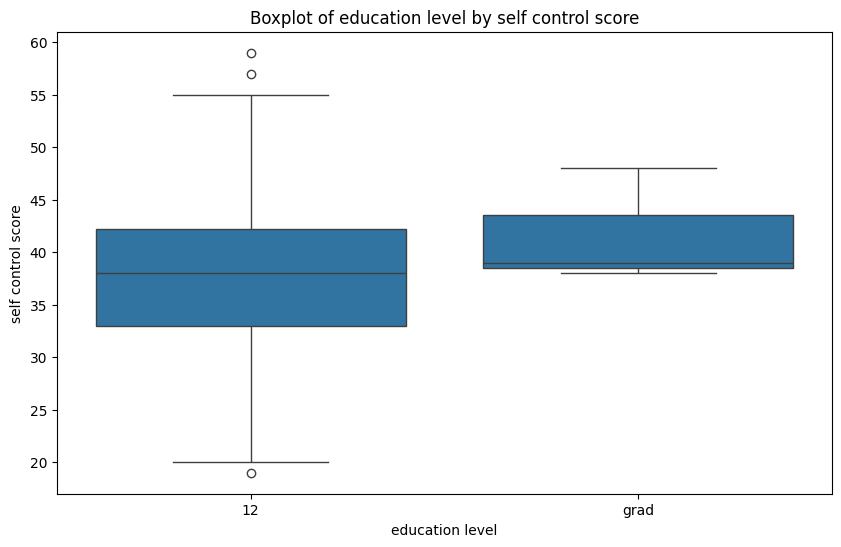

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='question_2', y='self control score', data=train_test_data)
plt.title('Boxplot of education level by self control score')
plt.xlabel('education level')
plt.ylabel('self control score')
plt.show()

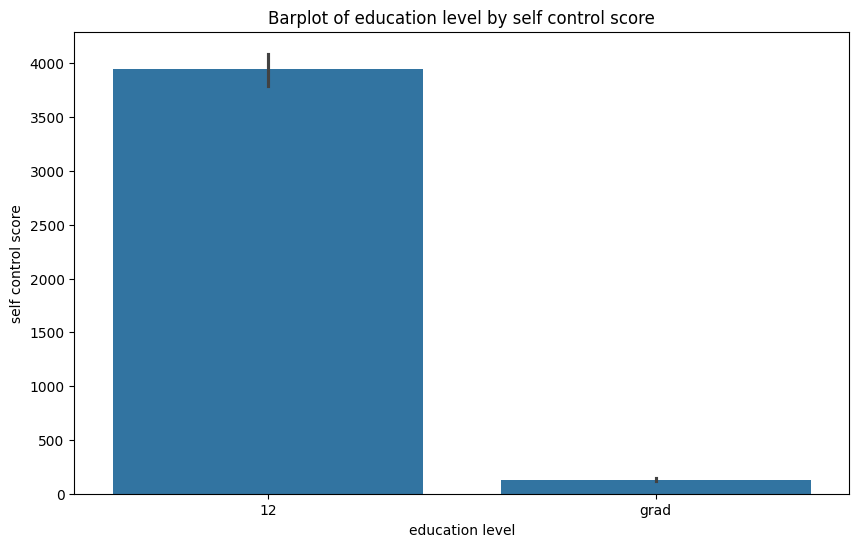

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='question_2', y='self control score', data=train_test_data,estimator=sum)
plt.title('Barplot of education level by self control score')
plt.xlabel('education level')
plt.ylabel('self control score')
plt.show()

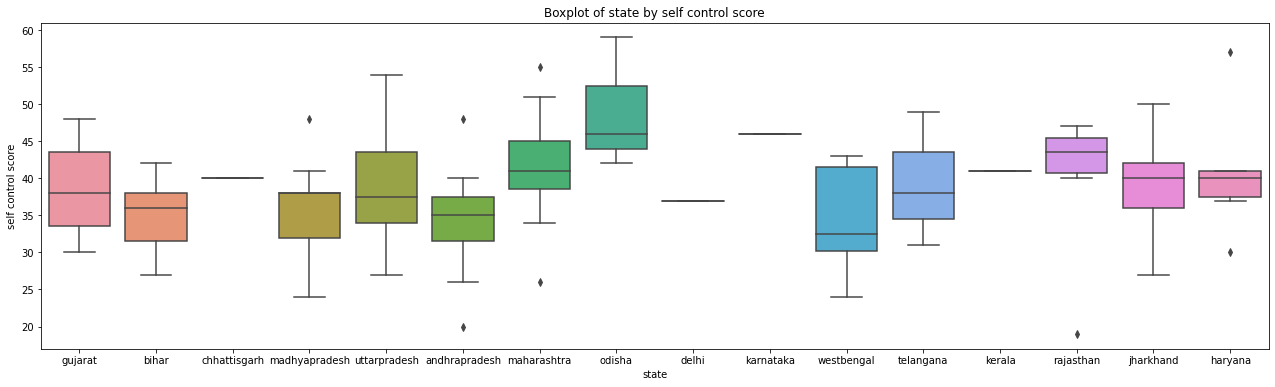

In [ ]:
plt.figure(figsize=(22, 6))
sns.boxplot(x='question_4', y='self control score', data=train_test_data)
plt.title('Boxplot of state by self control score')
plt.xlabel('state')
plt.ylabel('self control score')
plt.show()

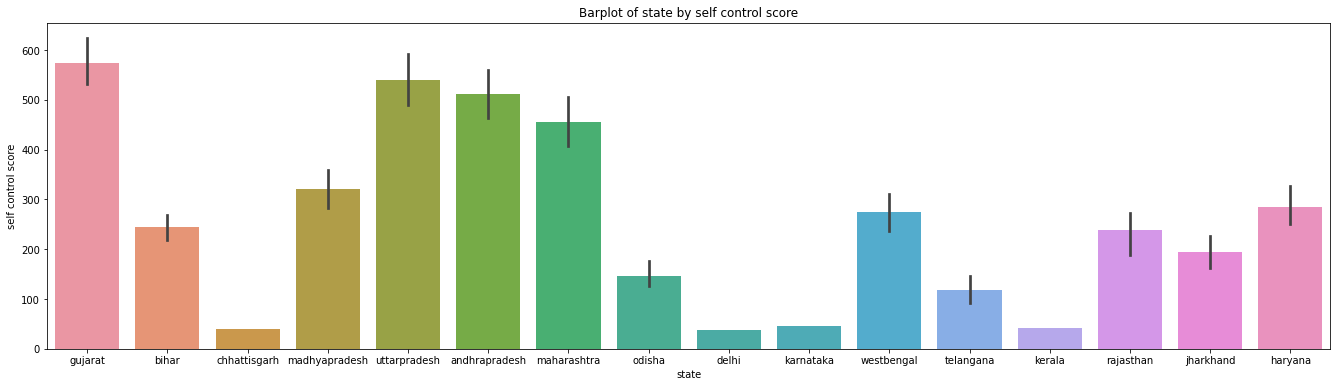

In [ ]:
plt.figure(figsize=(23, 6))
sns.barplot(x='question_4', y='self control score', data=train_test_data,estimator=sum)
plt.title('Barplot of state by self control score')
plt.xlabel('state')
plt.ylabel('self control score')
plt.show()

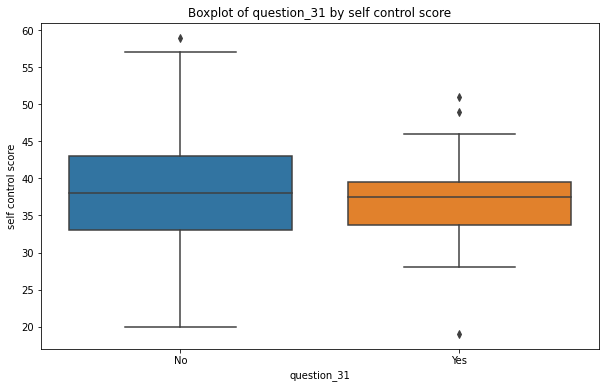

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='question_31', y='self control score', data=train_test_data)
plt.title('Boxplot of question_31 by self control score')
plt.xlabel('question_31')
plt.ylabel('self control score')
plt.show()

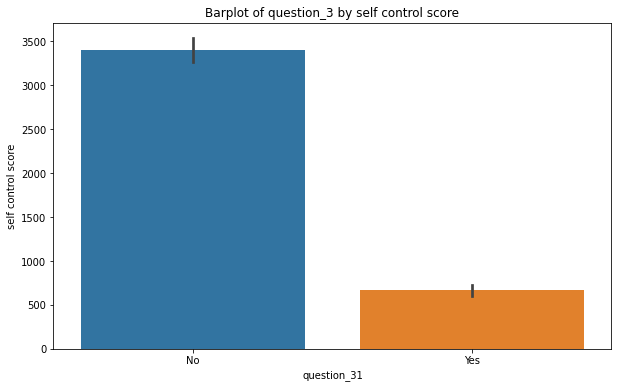

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='question_31', y='self control score', data=train_test_data,estimator=sum)
plt.title('Barplot of question_3 by self control score')
plt.xlabel('question_31')
plt.ylabel('self control score')
plt.show()

In [ ]:
## experimentation for models first model will contain all features from train_test_data
## next will contain all except languages and state
## next will contain only addiction score

In [ ]:
## data preparation for modeling

In [37]:
## converting question_3 to multi hot encoding
unique_languages=set()
for languages in train_test_data["question_3"]:
    for language in languages:
        unique_languages.add(language)
unique_languages

for language in unique_languages:
    train_test_data[language] = train_test_data["question_3"].apply(lambda x: 1 if language in x else 0)

<ipython-input-37-2ac3abd81ed4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_data[language] = train_test_data["question_3"].apply(lambda x: 1 if language in x else 0)
<ipython-input-37-2ac3abd81ed4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_data[language] = train_test_data["question_3"].apply(lambda x: 1 if language in x else 0)
<ipython-input-37-2ac3abd81ed4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [38]:
train_test_data.drop(columns=["question_3"],inplace=True)

<ipython-input-38-83bf076113c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_data.drop(columns=["question_3"],inplace=True)


In [39]:
dummy_data=pd.get_dummies(train_test_data,drop_first=True)
dummy_data

,question_0,addiction score,self control score,maithili,hindi,hinglish,tamil,marathi,urdu,gujarati,english,odia,nepali,awadhi,bhojpuri,marwari,bengali,japanese,sindhi,telugu,german,question_1_male,question_2_grad,question_4_bihar,question_4_chhattisgarh,question_4_delhi,question_4_gujarat,question_4_haryana,question_4_jharkhand,question_4_karnataka,question_4_kerala,question_4_madhyapradesh,question_4_maharashtra,question_4_odisha,question_4_rajasthan,question_4_telangana,question_4_uttarpradesh,question_4_westbengal,question_31_Yes
0,20,29.0,34.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,20,23.0,48.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,20,26.0,42.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,21,31.0,40.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,21,26.0,38.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,20,36.0,42.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
103,20,60.0,19.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
104,20,32.0,34.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
105,21,36.0,24.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [41]:
dummy_data.corr()

,question_0,addiction score,self control score,maithili,hindi,hinglish,tamil,marathi,urdu,gujarati,english,odia,nepali,awadhi,bhojpuri,marwari,bengali,japanese,sindhi,telugu,german,question_1_male,question_2_grad,question_4_bihar,question_4_chhattisgarh,question_4_delhi,question_4_gujarat,question_4_haryana,question_4_jharkhand,question_4_karnataka,question_4_kerala,question_4_madhyapradesh,question_4_maharashtra,question_4_odisha,question_4_rajasthan,question_4_telangana,question_4_uttarpradesh,question_4_westbengal,question_31_Yes
question_0,1.000000,0.051054,0.182295,-0.007521,0.229530,-0.096941,-0.007521,0.120809,0.075453,-0.229530,0.124301,0.179903,0.081899,0.171319,-0.186362,-0.007521,0.063816,-0.186362,0.081899,-0.379848,-0.096941,-0.106096,0.195331,0.257887,0.081899,-0.007521,-0.204747,-0.264065,0.105155,-0.007521,0.081899,0.224529,0.058779,0.143210,0.055923,-0.117394,0.174069,0.010701,-0.057826
addiction score,0.051054,1.000000,-0.599834,-0.059046,0.149202,-0.143536,-0.012108,-0.010280,0.170666,-0.089361,-0.139272,-0.063892,0.119321,0.044219,-0.068434,0.260136,0.146175,0.072382,-0.077822,0.110562,0.044219,-0.066707,0.033547,0.029123,-0.012108,0.091157,-0.089361,-0.208330,0.096516,-0.002720,-0.124760,0.001277,-0.107630,-0.032115,-0.002899,-0.081362,0.042707,0.225579,0.001896
self control score,0.182295,-0.599834,1.000000,0.051167,-0.052052,0.025403,-0.039007,0.018870,-0.131415,-0.005072,0.026085,0.264901,-0.051889,-0.051889,-0.064771,-0.245119,-0.107655,-0.013243,-0.026125,-0.217059,-0.103417,0.029102,0.081963,-0.111267,0.025403,-0.013243,0.016350,0.089248,0.028541,0.102695,0.038285,-0.090443,0.149751,0.247152,0.058358,0.029403,0.027962,-0.137726,-0.058004
maithili,-0.007521,-0.059046,0.051167,1.000000,0.039219,-0.009434,-0.009434,-0.019141,-0.019141,-0.039219,0.050824,-0.013405,-0.009434,-0.009434,-0.009434,-0.009434,-0.031186,-0.009434,-0.009434,-0.043681,-0.009434,0.050824,-0.016496,0.367112,-0.009434,-0.009434,-0.039219,-0.025698,-0.021505,-0.009434,-0.009434,-0.029434,-0.032878,-0.016496,-0.023673,-0.016496,-0.037685,-0.027611,-0.043681
hindi,0.229530,0.149202,-0.052052,0.039219,1.000000,-0.240544,0.039219,0.079573,0.079573,0.085507,0.116362,0.055728,0.039219,0.039219,0.039219,0.039219,0.037166,-0.240544,0.039219,-0.322155,0.039219,0.050832,0.068580,-0.002035,0.039219,0.039219,0.163043,-0.110902,0.089400,0.039219,-0.240544,0.122366,0.048046,0.068580,-0.018590,-0.094488,0.156666,0.012435,-0.178228
hinglish,-0.096941,-0.143536,0.025403,-0.009434,-0.240544,1.000000,-0.009434,-0.019141,-0.019141,-0.039219,-0.185619,-0.013405,-0.009434,-0.009434,-0.009434,-0.009434,-0.031186,-0.009434,-0.009434,-0.043681,-0.009434,0.050824,-0.016496,-0.025698,-0.009434,-0.009434,-0.039219,0.367112,-0.021505,-0.009434,-0.009434,-0.029434,-0.032878,-0.016496,-0.023673,-0.016496,-0.037685,-0.027611,-0.043681
tamil,-0.007521,-0.012108,-0.039007,-0.009434,0.039219,-0.009434,1.000000,-0.019141,-0.019141,-0.039219,0.050824,-0.013405,-0.009434,-0.009434,-0.009434,-0.009434,-0.031186,-0.009434,-0.009434,0.215976,-0.009434,0.050824,-0.016496,-0.025698,-0.009434,-0.009434,-0.039219,-0.025698,-0.021505,-0.009434,-0.009434,-0.029434,-0.032878,-0.016496,-0.023673,-0.016496,-0.037685,-0.027611,-0.043681
marathi,0.120809,-0.010280,0.018870,-0.019141,0.079573,-0.019141,-0.019141,1.000000,0.220874,-0.079573,-0.016813,-0.027198,-0.019141,-0.019141,-0.019141,-0.019141,-0.063274,-0.019141,-0.019141,-0.088624,-0.019141,-0.136744,-0.033470,-0.052139,-0.019141,-0.019141,-0.079573,-0.052139,-0.043631,-0.019141,-0.019141,-0.059720,0.582171,-0.033470,-0.048032,-0.033470,-0.076460,-0.056019,-0.088624
urdu,0.075453,0.170666,-0.131415,-0.019141,0.079573,-0.019141,-0.019141,0.220874,1.000000,-0.079573,-0.016813,-0.027198,0.492874,-0.019141,-0.019141,-0.019141,-0.063274,-0.019141,-0.019141,0.043081,-0.019141,0.103118,-0.033470,-0.052139,0.492874,-0.019141,-0.079573,-0.052139,-0.043631,-0.019141,-0.019141,-0.059720,0.095512,-0.033470,-0.048032,-0.033470,-0.076460,0.13

In [ ]:
## experiment 1

In [40]:
x_train,x_test,y_train,y_test=train_test_split(dummy_data.drop(columns=["self control score"]),dummy_data["self control score"],test_size=9,random_state=42)

In [42]:
x_train=np.reshape(x_train.values,(98,38))
x_test=np.reshape(x_test.values,(9,38))
y_train=np.reshape(y_train.values,(98,1))
y_test=np.reshape(y_test.values,(9,1))

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((98, 38), (9, 38), (98, 1), (9, 1))

In [47]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)
x_train = sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

# Fit OLS model
model_1 = sm.OLS(y_train, x_train).fit()

# # Generate summary table
summary_table = model_1.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     2.738
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           0.000252
Time:                        06:18:49   Log-Likelihood:                -290.65
No. Observations:                  98   AIC:                             657.3
Df Residuals:                      60   BIC:                             755.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9734     18.713      0.373      0.7

In [ ]:
## experiment 2

In [48]:
train_test_data_2=train_test_data_original.drop(columns=["question_3","question_4"])
dummy_data2=pd.get_dummies(train_test_data_2,drop_first=True)
dummy_data2

,question_0,addiction score,self control score,question_1_male,question_2_grad,question_31_Yes
0,20,29.0,34.0,True,False,False
1,20,23.0,48.0,True,True,False
2,20,26.0,42.0,True,False,False
3,21,31.0,40.0,True,False,True
4,21,26.0,38.0,True,False,True
...,...,...,...,...,...,...
102,20,36.0,42.0,True,False,False
103,20,60.0,19.0,True,False,True
104,20,32.0,34.0,True,False,False
105,21,36.0,24.0,True,False,False


In [45]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(dummy_data2.drop(columns=["self control score",]),dummy_data["self control score"],test_size=9,random_state=42)

In [46]:
x_train_2=np.reshape(x_train_2.values,(98,5))
x_test_2=np.reshape(x_test_2.values,(9,5))
y_train_2=np.reshape(y_train_2.values,(98,1))
y_test_2=np.reshape(y_test_2.values,(9,1))

x_train_2.shape,x_test_2.shape,y_train_2.shape,y_test_2.shape

((98, 5), (9, 5), (98, 1), (9, 1))

In [49]:
x_train_2 = x_train.astype(float)
x_test_2 = x_test.astype(float)
x_train_2 = sm.add_constant(x_train_2)
x_test_2=sm.add_constant(x_test_2)

# Fit OLS model
model_2 = sm.OLS(y_train_2, x_train_2).fit()

# # Generate summary table
summary_table_2 = model_2.summary()
print(summary_table_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     2.738
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           0.000252
Time:                        06:19:38   Log-Likelihood:                -290.65
No. Observations:                  98   AIC:                             657.3
Df Residuals:                      60   BIC:                             755.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9734     18.713      0.373      0.7

In [ ]:
## experiment 3

In [50]:
x=dummy_data[["addiction score"]]
y=dummy_data[["self control score"]]
# x=x_train
# y=y_train
x = sm.add_constant(x)

model_3 = sm.OLS(y, x)
# Fit OLS model on the entire dataset
fitted_model = model_3.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     self control score   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     59.01
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           8.65e-12
Time:                        06:19:56   Log-Likelihood:                -344.13
No. Observations:                 107   AIC:                             692.3
Df Residuals:                     105   BIC:                             697.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              52.1428      1.929     27.025      0.000      48.317      55.968
addiction score    -0.4371      0.057     -7.682      0.000      -0.550      -0.324
==============================================================================
Omnibus:                        0.358   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.493
Skew:                           0.120   Prob(JB):                        0.782
Kurtosis:                       2.769   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## experiment 4 age,addiction score vs self control score

In [51]:
x_2=dummy_data[["addiction score","question_0"]]
y_2=dummy_data[["self control score"]]

x_2 = sm.add_constant(x_2)

model_4 = sm.OLS(y_2, x_2)

# Fit OLS model on the entire dataset
fitted_model_4 = model_4.fit()
fitted_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     self control score   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     35.43
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.84e-12
Time:                        06:20:04   Log-Likelihood:                -340.19
No. Observations:                 107   AIC:                             686.4
Df Residuals:                     104   BIC:                             694.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.6378     10.631      2.129      0.036       1.556      43.720
addiction score    -0.4451      0.055     -8.066      0.000      -0.554      -0.336
question_0          1.4818      0.526      2.819      0.006       0.440       2.524
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.228
Skew:                          -0.010   Prob(JB):                        0.892
Kurtosis:                       2.775   Cond. No.                         729.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## visualizing experiment 3

In [52]:
addiction_coef=fitted_model.params[["addiction score"]].values[0]
intercept=fitted_model.params[["const"]].values[0]

In [53]:
## prediction line data
x_pred=np.linspace(10,60,200)
y_pred=x_pred*addiction_coef+intercept

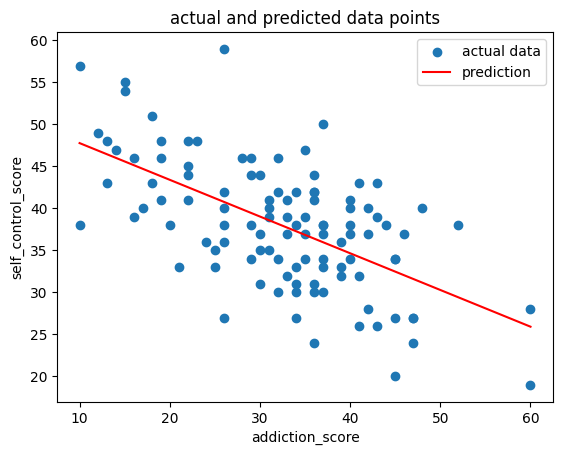

In [54]:
plt.scatter(x="addiction score",y="self control score",data=dummy_data,label="actual data")
plt.plot(x_pred, y_pred,color="red",label="prediction")
plt.title("actual and predicted data points")
plt.xlabel("addiction_score")
plt.ylabel("self_control_score")
plt.legend()
plt.show()

In [ ]:
## prediction for experiment 4

In [55]:
cons_val=fitted_model_4.params.values[0]
addiction_val=fitted_model_4.params.values[1]
age_val=fitted_model_4.params.values[2]

In [56]:
addiction_val

-0.4450702469142258

In [57]:
np.random.seed(0)
x1 =np.random.uniform(10,60,50)   # Adjust the mean and standard deviation to fit your desired range
x2 = np.random.uniform(18,25,20)
x1, x2 = np.meshgrid(x1, x2)# Adjust the mean and standard deviation to fit your desired range
inter = 1
y_pred=x1*addiction_val+x2*age_val+inter*cons_val


In [58]:
import plotly.graph_objs as go

# Scatter plot data
scatter_data = go.Scatter3d(
    x=dummy_data['addiction score'],
    y=dummy_data['question_0'],
    z=dummy_data['self control score'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)

# Surface plot data
surface_data = go.Surface(
    x=x1,
    y=x2,
    z=y_pred,
    opacity=0.5,  # Adjust opacity for transparency
    colorscale='Viridis',  # Choose a colorscale
)

# Create the figure
fig = go.Figure(data=[scatter_data, surface_data])

# Set layout options
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis'),
        zaxis=dict(title='Z-axis')
    ),
    title='Interactive 3D Plot with Scatter and Surface'
)

# Show the interactive plot
fig.show()
